In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.optim import Adam


from src.core.trainer import Trainer
from src.utils.data import ParallelInfiniteDataLoader
from src.dataset import StandardDataset, CombinedDataset
from src.core.config import Config
from src.core.model_config import ModelConfig
from src.network import Model
from src.utils.optimizer import SophiaG
from src.utils.callbacks import ModelCheckpoint
from src.utils.layers import Conv2d, LDConv2d, CDConv2d
from src.utils.transform import *
import torchvision.transforms as t

import random
import numpy as np

random.seed(Config.SEED)
np.random.seed(Config.SEED)


ModelConfig.IN_CHANNELS = 3
Config.ACCUMULATED_GRADIENT_STEPS = 4


train_data_settings = {'get_real': None, 
                       'get_hsv': False if ModelConfig.IN_CHANNELS == 3 else True}

transform= t.Compose([ToTensor()])

# ## Casia_FASD
ds1 = CombinedDataset(['data/train_img', 'data/test_img'], **train_data_settings, transform = transform)
smplr1 = WeightedRandomSampler(ds1.get_weight(), len(ds1))
dl1 = DataLoader(ds1, batch_size= 1, sampler = smplr1)
## NUAA
ds2 = CombinedDataset(['data/NUAA/train', 'data/NUAA/test'], **train_data_settings, transform = transform)
smplr2 = WeightedRandomSampler(ds2.get_weight(), len(ds2))
dl2 = DataLoader(ds2, batch_size= 1, sampler = smplr2)


## Zalo
ds3 = StandardDataset('data/zalo_data', transform = t.Compose([ToTensor()]), **train_data_settings)

smplr3 = WeightedRandomSampler(ds3.get_weight(), len(ds3))
dl3 = DataLoader(ds3, batch_size= Config.BATCH_SIZE, sampler = smplr3)

# weight = np.array(ds3.get_weight())
# weight /= weight.sum()
# indices_list = np.random.choice(list(range(len(ds3))), Config.BATCH_SIZE * 100, False,weight)
# ds3 = torch.utils.data.Subset(ds3, indices_list)
# dl3 = DataLoader(ds3, batch_size= 1, shuffle= True)

## LCC_FASD
ds4 = CombinedDataset(['data/LCC_FASD_evaluation', 'data/LCC_FASD_training'], **train_data_settings, transform = transform)
smplr4 = WeightedRandomSampler(ds4.get_weight(), len(ds4))
dl4 = DataLoader(ds4, batch_size= 1, sampler = smplr4)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18840\4000153316.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


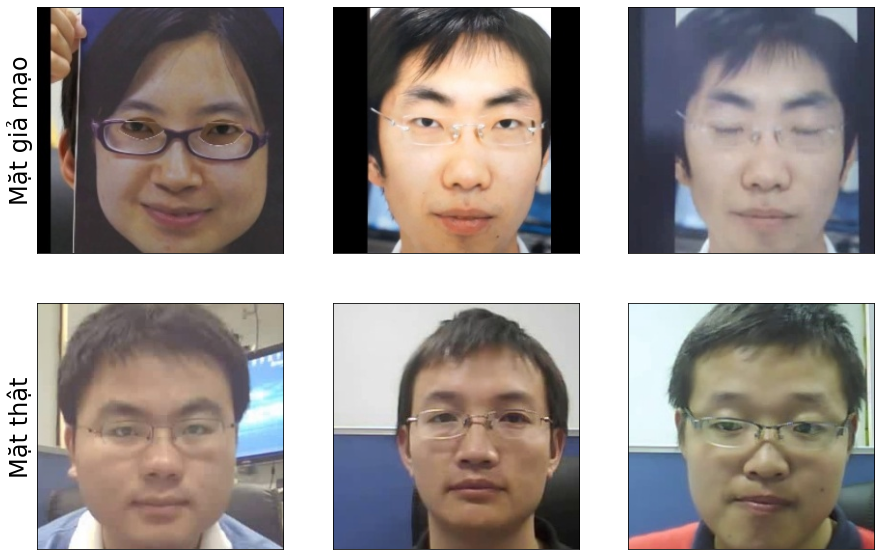

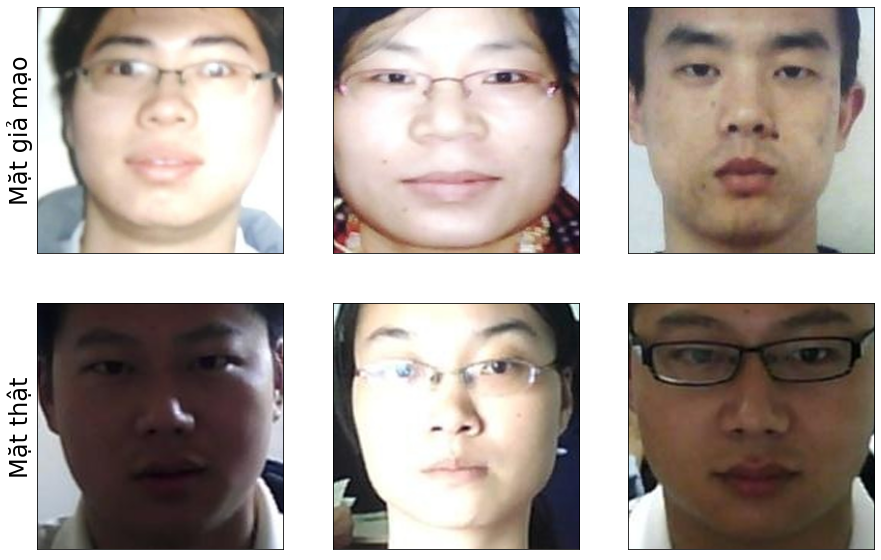

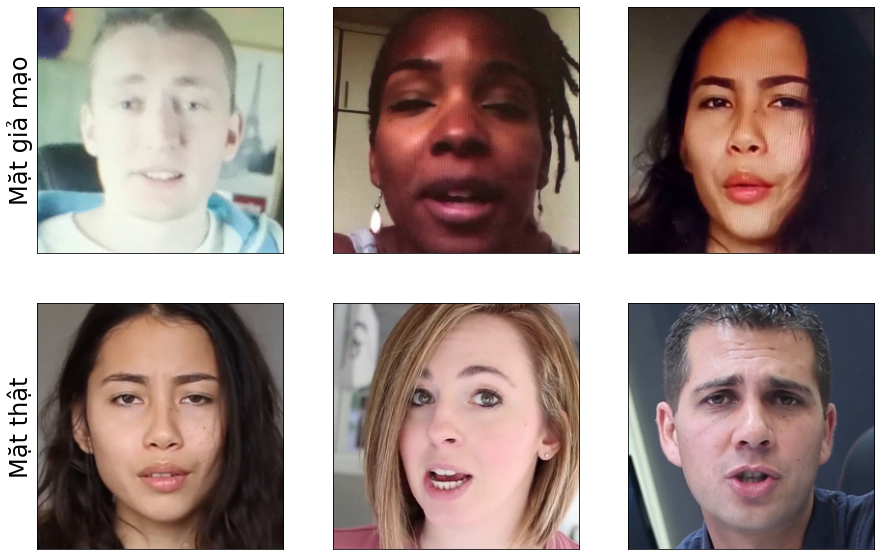

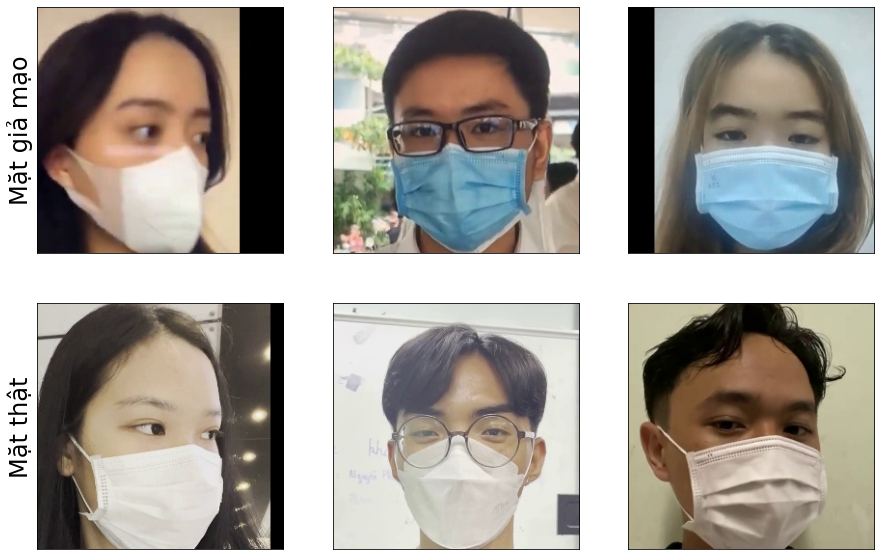

In [23]:
import matplotlib.pyplot as plt

dls = [dl1, dl2, dl4, dl3]
FONTSIZE = 24
# torch.random.manual_seed(random.randint(0,10000))

for dl in dls:
    dl = iter(dl)
    
    fig, ax = plt.subplots(2,3, figsize = (15,10))

    ax[0,0].set_ylabel('Mặt giả mạo', fontsize = FONTSIZE)
    ax[1,0].set_ylabel('Mặt thật', fontsize = FONTSIZE)

    i = 0
    while i <6:
        img, dep, label = next(dl)
        img, dep, label = img[0], dep[0], label[0]

        if label == 0 and i<3:
            ax[i//3, i%3].imshow(img.permute(1,2,0).numpy());
            ax[i//3, i%3].set_xticks([])
            ax[i//3, i%3].set_yticks([])
            i += 1

        if label == 1 and i>=3:
            ax[i//3, i%3].imshow(img.permute(1,2,0).numpy());
            ax[i//3, i%3].set_xticks([])
            ax[i//3, i%3].set_yticks([])
            i += 1

        
    fig.show()
